In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [53]:
data_raw = pd.read_csv("covid.csv")

In [54]:
data_raw.describe(include="all")

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58,58,58,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,58,56.000000,33.000000
unique,58,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,Texas,US,2020-05-21 02:32:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN
freq,1,58,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,NaN
mean,NaN,NaN,NaN,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,NaN,3894.186870,14.342541
std,NaN,NaN,NaN,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,NaN,1933.169297,5.047403
min,NaN,NaN,NaN,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,NaN,97.702058,6.778043
25%,NaN,NaN,NaN,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,NaN,2712.800274,10.000000
50%,NaN,NaN,NaN,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,NaN,3469.782532,13.598326
75%,NaN,NaN,NaN,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,NaN,4763.649736,17.658649


In [55]:
data_raw.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [56]:
data_raw.describe(include="all")

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58,58,58,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,58,56.000000,33.000000
unique,58,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,Texas,US,2020-05-21 02:32:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN
freq,1,58,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,NaN
mean,NaN,NaN,NaN,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,NaN,3894.186870,14.342541
std,NaN,NaN,NaN,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,NaN,1933.169297,5.047403
min,NaN,NaN,NaN,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,NaN,97.702058,6.778043
25%,NaN,NaN,NaN,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,NaN,2712.800274,10.000000
50%,NaN,NaN,NaN,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,NaN,3469.782532,13.598326
75%,NaN,NaN,NaN,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,NaN,4763.649736,17.658649


In [57]:
data_raw.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [58]:
data_raw[data_raw.duplicated()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate


In [59]:
data_raw.isnull()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
9,False,False,False,True,True,False,False,True,False,False,True,True,True,False,False,False,True,True


In [60]:
data_raw.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [61]:
data_raw.describe(include="all")

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58,58,58,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,58,56.000000,33.000000
unique,58,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,Texas,US,2020-05-21 02:32:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN
freq,1,58,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,NaN,NaN
mean,NaN,NaN,NaN,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,NaN,3894.186870,14.342541
std,NaN,NaN,NaN,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,NaN,1933.169297,5.047403
min,NaN,NaN,NaN,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,NaN,97.702058,6.778043
25%,NaN,NaN,NaN,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,NaN,2712.800274,10.000000
50%,NaN,NaN,NaN,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,NaN,3469.782532,13.598326
75%,NaN,NaN,NaN,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,NaN,4763.649736,17.658649


In [62]:
data_no_miss_val = data_raw.dropna()

In [63]:
data_no_miss_val.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [64]:
data_no_miss_val.describe(include="all")

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,27,27,27,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000,2.700000e+01,27,27.000000,27.000000
unique,27,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,Minnesota,US,2020-05-21 02:32:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN
freq,1,27,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN
mean,NaN,NaN,NaN,39.579870,-95.279459,24137.925926,1573.185185,5846.629630,16718.111111,31.333333,377.854090,1.736362e+05,4651.777778,3.919288,8.400003e+07,NaN,4056.088215,14.168048
std,NaN,NaN,NaN,5.719976,19.562585,66961.033471,5462.200733,11641.005515,50332.706229,15.568706,405.143373,2.766633e+05,14561.282048,1.887983,1.556871e+01,NaN,2170.885215,5.346878
min,NaN,NaN,NaN,21.094300,-157.498300,478.000000,11.000000,440.000000,22.000000,4.000000,44.723974,1.884000e+04,65.000000,1.101269,8.400000e+07,NaN,2158.119598,6.778043
25%,NaN,NaN,NaN,35.656550,-106.775500,3834.500000,83.500000,1288.500000,1005.500000,20.500000,153.006366,5.504400e+04,358.000000,2.509186,8.400002e+07,NaN,2697.895652,9.652277
50%,NaN,NaN,NaN,40.150000,-93.900200,8167.000000,299.000000,3023.000000,3716.000000,33.000000,269.608008,1.318370e+05,1139.000000,4.013194,8.400003e+07,NaN,3270.352122,13.061686
75%,NaN,NaN,NaN,44.254500,-79.557500,16288.000000,658.500000,4987.000000,9109.000000,44.500000,390.704998,1.675255e+05,2085.500000,4.837599,8.400004e+07,NaN,4619.368934,17.408409


In [65]:
data_positive_min = data_no_miss_val[data_no_miss_val["Confirmed"] < 0]
data_positive_min.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate


In [66]:
data_recovered_min = data_no_miss_val[data_no_miss_val["Recovered"] < 0]
data_recovered_min.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate


In [68]:
data_conf_pos = data_no_miss_val[data_no_miss_val["Confirmed"] >= 0]
data_conf_pos.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000,2.700000e+01,27.000000,27.000000
mean,39.579870,-95.279459,24137.925926,1573.185185,5846.629630,16718.111111,31.333333,377.854090,1.736362e+05,4651.777778,3.919288,8.400003e+07,4056.088215,14.168048
std,5.719976,19.562585,66961.033471,5462.200733,11641.005515,50332.706229,15.568706,405.143373,2.766633e+05,14561.282048,1.887983,1.556871e+01,2170.885215,5.346878
min,21.094300,-157.498300,478.000000,11.000000,440.000000,22.000000,4.000000,44.723974,1.884000e+04,65.000000,1.101269,8.400000e+07,2158.119598,6.778043
25%,35.656550,-106.775500,3834.500000,83.500000,1288.500000,1005.500000,20.500000,153.006366,5.504400e+04,358.000000,2.509186,8.400002e+07,2697.895652,9.652277
50%,40.150000,-93.900200,8167.000000,299.000000,3023.000000,3716.000000,33.000000,269.608008,1.318370e+05,1139.000000,4.013194,8.400003e+07,3270.352122,13.061686
75%,44.254500,-79.557500,16288.000000,658.500000,4987.000000,9109.000000,44.500000,390.704998,1.675255e+05,2085.500000,4.837599,8.400004e+07,4619.368934,17.408409
max,47.528900,-69.381900,354370.000000,28636.000000,61886.000000,263848.000000,56.000000,1821.620216,1.505836e+06,76410.000000,9.044775,8.400006e+07,11377.424693,28.054438


In [69]:
data_death_pos = data_conf_pos[data_conf_pos["Deaths"] >= 0]
data_death_pos.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000,2.700000e+01,27.000000,27.000000
mean,39.579870,-95.279459,24137.925926,1573.185185,5846.629630,16718.111111,31.333333,377.854090,1.736362e+05,4651.777778,3.919288,8.400003e+07,4056.088215,14.168048
std,5.719976,19.562585,66961.033471,5462.200733,11641.005515,50332.706229,15.568706,405.143373,2.766633e+05,14561.282048,1.887983,1.556871e+01,2170.885215,5.346878
min,21.094300,-157.498300,478.000000,11.000000,440.000000,22.000000,4.000000,44.723974,1.884000e+04,65.000000,1.101269,8.400000e+07,2158.119598,6.778043
25%,35.656550,-106.775500,3834.500000,83.500000,1288.500000,1005.500000,20.500000,153.006366,5.504400e+04,358.000000,2.509186,8.400002e+07,2697.895652,9.652277
50%,40.150000,-93.900200,8167.000000,299.000000,3023.000000,3716.000000,33.000000,269.608008,1.318370e+05,1139.000000,4.013194,8.400003e+07,3270.352122,13.061686
75%,44.254500,-79.557500,16288.000000,658.500000,4987.000000,9109.000000,44.500000,390.704998,1.675255e+05,2085.500000,4.837599,8.400004e+07,4619.368934,17.408409
max,47.528900,-69.381900,354370.000000,28636.000000,61886.000000,263848.000000,56.000000,1821.620216,1.505836e+06,76410.000000,9.044775,8.400006e+07,11377.424693,28.054438


In [70]:
data_recove_pos = data_death_pos[data_death_pos["Recovered"] >= 0]
data_recove_pos.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000,2.700000e+01,27.000000,27.000000
mean,39.579870,-95.279459,24137.925926,1573.185185,5846.629630,16718.111111,31.333333,377.854090,1.736362e+05,4651.777778,3.919288,8.400003e+07,4056.088215,14.168048
std,5.719976,19.562585,66961.033471,5462.200733,11641.005515,50332.706229,15.568706,405.143373,2.766633e+05,14561.282048,1.887983,1.556871e+01,2170.885215,5.346878
min,21.094300,-157.498300,478.000000,11.000000,440.000000,22.000000,4.000000,44.723974,1.884000e+04,65.000000,1.101269,8.400000e+07,2158.119598,6.778043
25%,35.656550,-106.775500,3834.500000,83.500000,1288.500000,1005.500000,20.500000,153.006366,5.504400e+04,358.000000,2.509186,8.400002e+07,2697.895652,9.652277
50%,40.150000,-93.900200,8167.000000,299.000000,3023.000000,3716.000000,33.000000,269.608008,1.318370e+05,1139.000000,4.013194,8.400003e+07,3270.352122,13.061686
75%,44.254500,-79.557500,16288.000000,658.500000,4987.000000,9109.000000,44.500000,390.704998,1.675255e+05,2085.500000,4.837599,8.400004e+07,4619.368934,17.408409
max,47.528900,-69.381900,354370.000000,28636.000000,61886.000000,263848.000000,56.000000,1821.620216,1.505836e+06,76410.000000,9.044775,8.400006e+07,11377.424693,28.054438


In [71]:
data_pos = data_recove_pos

In [72]:
data_pos.describe(include="all")

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,27,27,27,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000,2.700000e+01,27,27.000000,27.000000
unique,27,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,Minnesota,US,2020-05-21 02:32:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN
freq,1,27,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN
mean,NaN,NaN,NaN,39.579870,-95.279459,24137.925926,1573.185185,5846.629630,16718.111111,31.333333,377.854090,1.736362e+05,4651.777778,3.919288,8.400003e+07,NaN,4056.088215,14.168048
std,NaN,NaN,NaN,5.719976,19.562585,66961.033471,5462.200733,11641.005515,50332.706229,15.568706,405.143373,2.766633e+05,14561.282048,1.887983,1.556871e+01,NaN,2170.885215,5.346878
min,NaN,NaN,NaN,21.094300,-157.498300,478.000000,11.000000,440.000000,22.000000,4.000000,44.723974,1.884000e+04,65.000000,1.101269,8.400000e+07,NaN,2158.119598,6.778043
25%,NaN,NaN,NaN,35.656550,-106.775500,3834.500000,83.500000,1288.500000,1005.500000,20.500000,153.006366,5.504400e+04,358.000000,2.509186,8.400002e+07,NaN,2697.895652,9.652277
50%,NaN,NaN,NaN,40.150000,-93.900200,8167.000000,299.000000,3023.000000,3716.000000,33.000000,269.608008,1.318370e+05,1139.000000,4.013194,8.400003e+07,NaN,3270.352122,13.061686
75%,NaN,NaN,NaN,44.254500,-79.557500,16288.000000,658.500000,4987.000000,9109.000000,44.500000,390.704998,1.675255e+05,2085.500000,4.837599,8.400004e+07,NaN,4619.368934,17.408409


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Confirmed', ylabel='Density'>

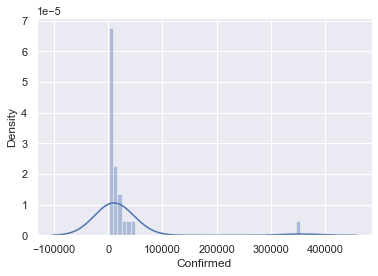

In [73]:
sns.distplot(data_pos["Confirmed"])

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Deaths', ylabel='Density'>

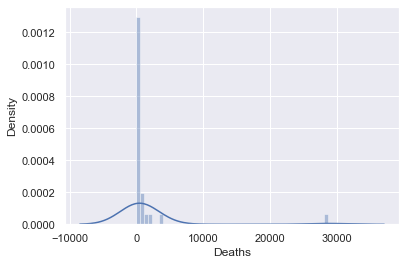

In [74]:
sns.distplot(data_pos["Deaths"])

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recovered', ylabel='Density'>

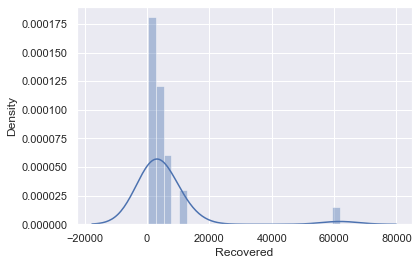

In [75]:
sns.distplot(data_pos["Recovered"])

In [76]:
percentage_data = 0.95

In [77]:
q = data_pos["Confirmed"].quantile(percentage_data)
q

41331.2

In [78]:
data_confirmed_rm_out = data_pos[data_pos["Confirmed"] < q]

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Confirmed', ylabel='Density'>

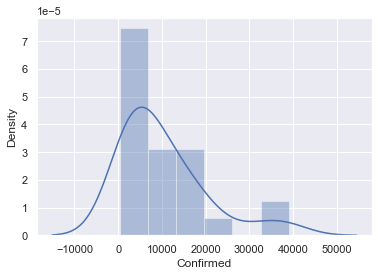

In [31]:
sns.distplot(data_confirmed_rm_out["Confirmed"])

In [32]:
q = data_confirmed_rm_out["Deaths"].quantile(percentage_data)
q

1254.1999999999994

In [33]:
data_death_rm_out = data_confirmed_rm_out[data_confirmed_rm_out["Deaths"] < q]

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Deaths', ylabel='Density'>

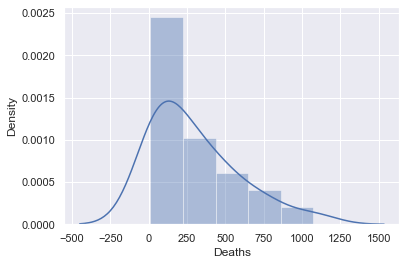

In [34]:
sns.distplot(data_death_rm_out['Deaths'])

In [35]:
q = data_death_rm_out["Recovered"].quantile(percentage_data)
q

11377.499999999993

In [37]:
data_recove_rm_out = data_death_rm_out[data_death_rm_out["Recovered"] < q]

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recovered', ylabel='Density'>

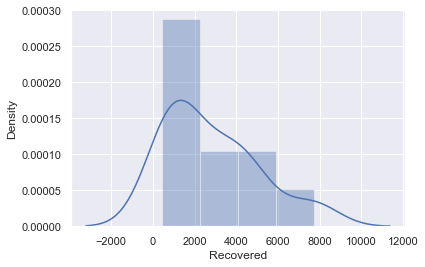

In [38]:
sns.distplot(data_recove_rm_out["Recovered"])

In [39]:
data_clean = data_recove_rm_out.reset_index(drop=True)

In [40]:
data_clean.describe(include="all")

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,21,21,21,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21,21.000000,21.000000
unique,21,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,Wisconsin,US,2020-05-21 02:32:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,NaN,NaN
freq,1,21,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN
mean,NaN,NaN,NaN,39.301286,-98.196962,7482.619048,276.095238,2820.380952,4386.142857,33.095238,267.011156,101100.238095,1098.619048,3.422673,8.400003e+07,NaN,3924.873332,13.181610
std,NaN,NaN,NaN,6.267666,20.411919,7318.370765,280.061048,2244.192337,6203.673487,15.578526,254.145947,58526.426361,1332.074941,1.306544,1.557853e+01,NaN,2248.308903,4.570918
min,NaN,NaN,NaN,21.094300,-157.498300,478.000000,11.000000,440.000000,22.000000,4.000000,44.723974,18840.000000,65.000000,1.101269,8.400000e+07,NaN,2158.119598,6.778043
25%,NaN,NaN,NaN,34.969700,-110.454400,2506.000000,73.000000,1100.000000,761.000000,21.000000,139.803906,46304.000000,231.000000,2.374515,8.400002e+07,NaN,2623.237570,9.402795
50%,NaN,NaN,NaN,40.150000,-96.928900,5532.000000,190.000000,1882.000000,2403.000000,35.000000,204.788838,102149.000000,723.000000,3.586073,8.400004e+07,NaN,3255.240955,12.699285
75%,NaN,NaN,NaN,44.268500,-84.670100,9175.000000,407.000000,4266.000000,4965.000000,45.000000,292.004226,144371.000000,1486.000000,4.479975,8.400004e+07,NaN,3742.560000,16.111235


In [45]:
data_clean.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
16,South Dakota,US,2020-05-21 02:32:54,44.2998,-99.4388,4177,46,3023.0,1108.0,46,472.159329,30389.0,333.0,1.101269,84000046,USA,3435.108895,7.972229
17,Utah,US,2020-05-21 02:32:54,40.1500,-111.8624,7710,90,4423.0,3197.0,49,240.489738,179664.0,631.0,1.167315,84000049,USA,5604.065930,8.184176
18,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
19,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
20,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


In [46]:
data_clean.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000
mean,39.301286,-98.196962,7482.619048,276.095238,2820.380952,4386.142857,33.095238,267.011156,101100.238095,1098.619048,3.422673,8.400003e+07,3924.873332,13.181610
std,6.267666,20.411919,7318.370765,280.061048,2244.192337,6203.673487,15.578526,254.145947,58526.426361,1332.074941,1.306544,1.557853e+01,2248.308903,4.570918
min,21.094300,-157.498300,478.000000,11.000000,440.000000,22.000000,4.000000,44.723974,18840.000000,65.000000,1.101269,8.400000e+07,2158.119598,6.778043
25%,34.969700,-110.454400,2506.000000,73.000000,1100.000000,761.000000,21.000000,139.803906,46304.000000,231.000000,2.374515,8.400002e+07,2623.237570,9.402795
50%,40.150000,-96.928900,5532.000000,190.000000,1882.000000,2403.000000,35.000000,204.788838,102149.000000,723.000000,3.586073,8.400004e+07,3255.240955,12.699285
75%,44.268500,-84.670100,9175.000000,407.000000,4266.000000,4965.000000,45.000000,292.004226,144371.000000,1486.000000,4.479975,8.400004e+07,3742.560000,16.111235
max,47.528900,-69.381900,32908.000000,1075.000000,7728.000000,27310.000000,56.000000,1260.760024,212626.000000,6059.000000,5.404917,8.400006e+07,11377.424693,24.611240


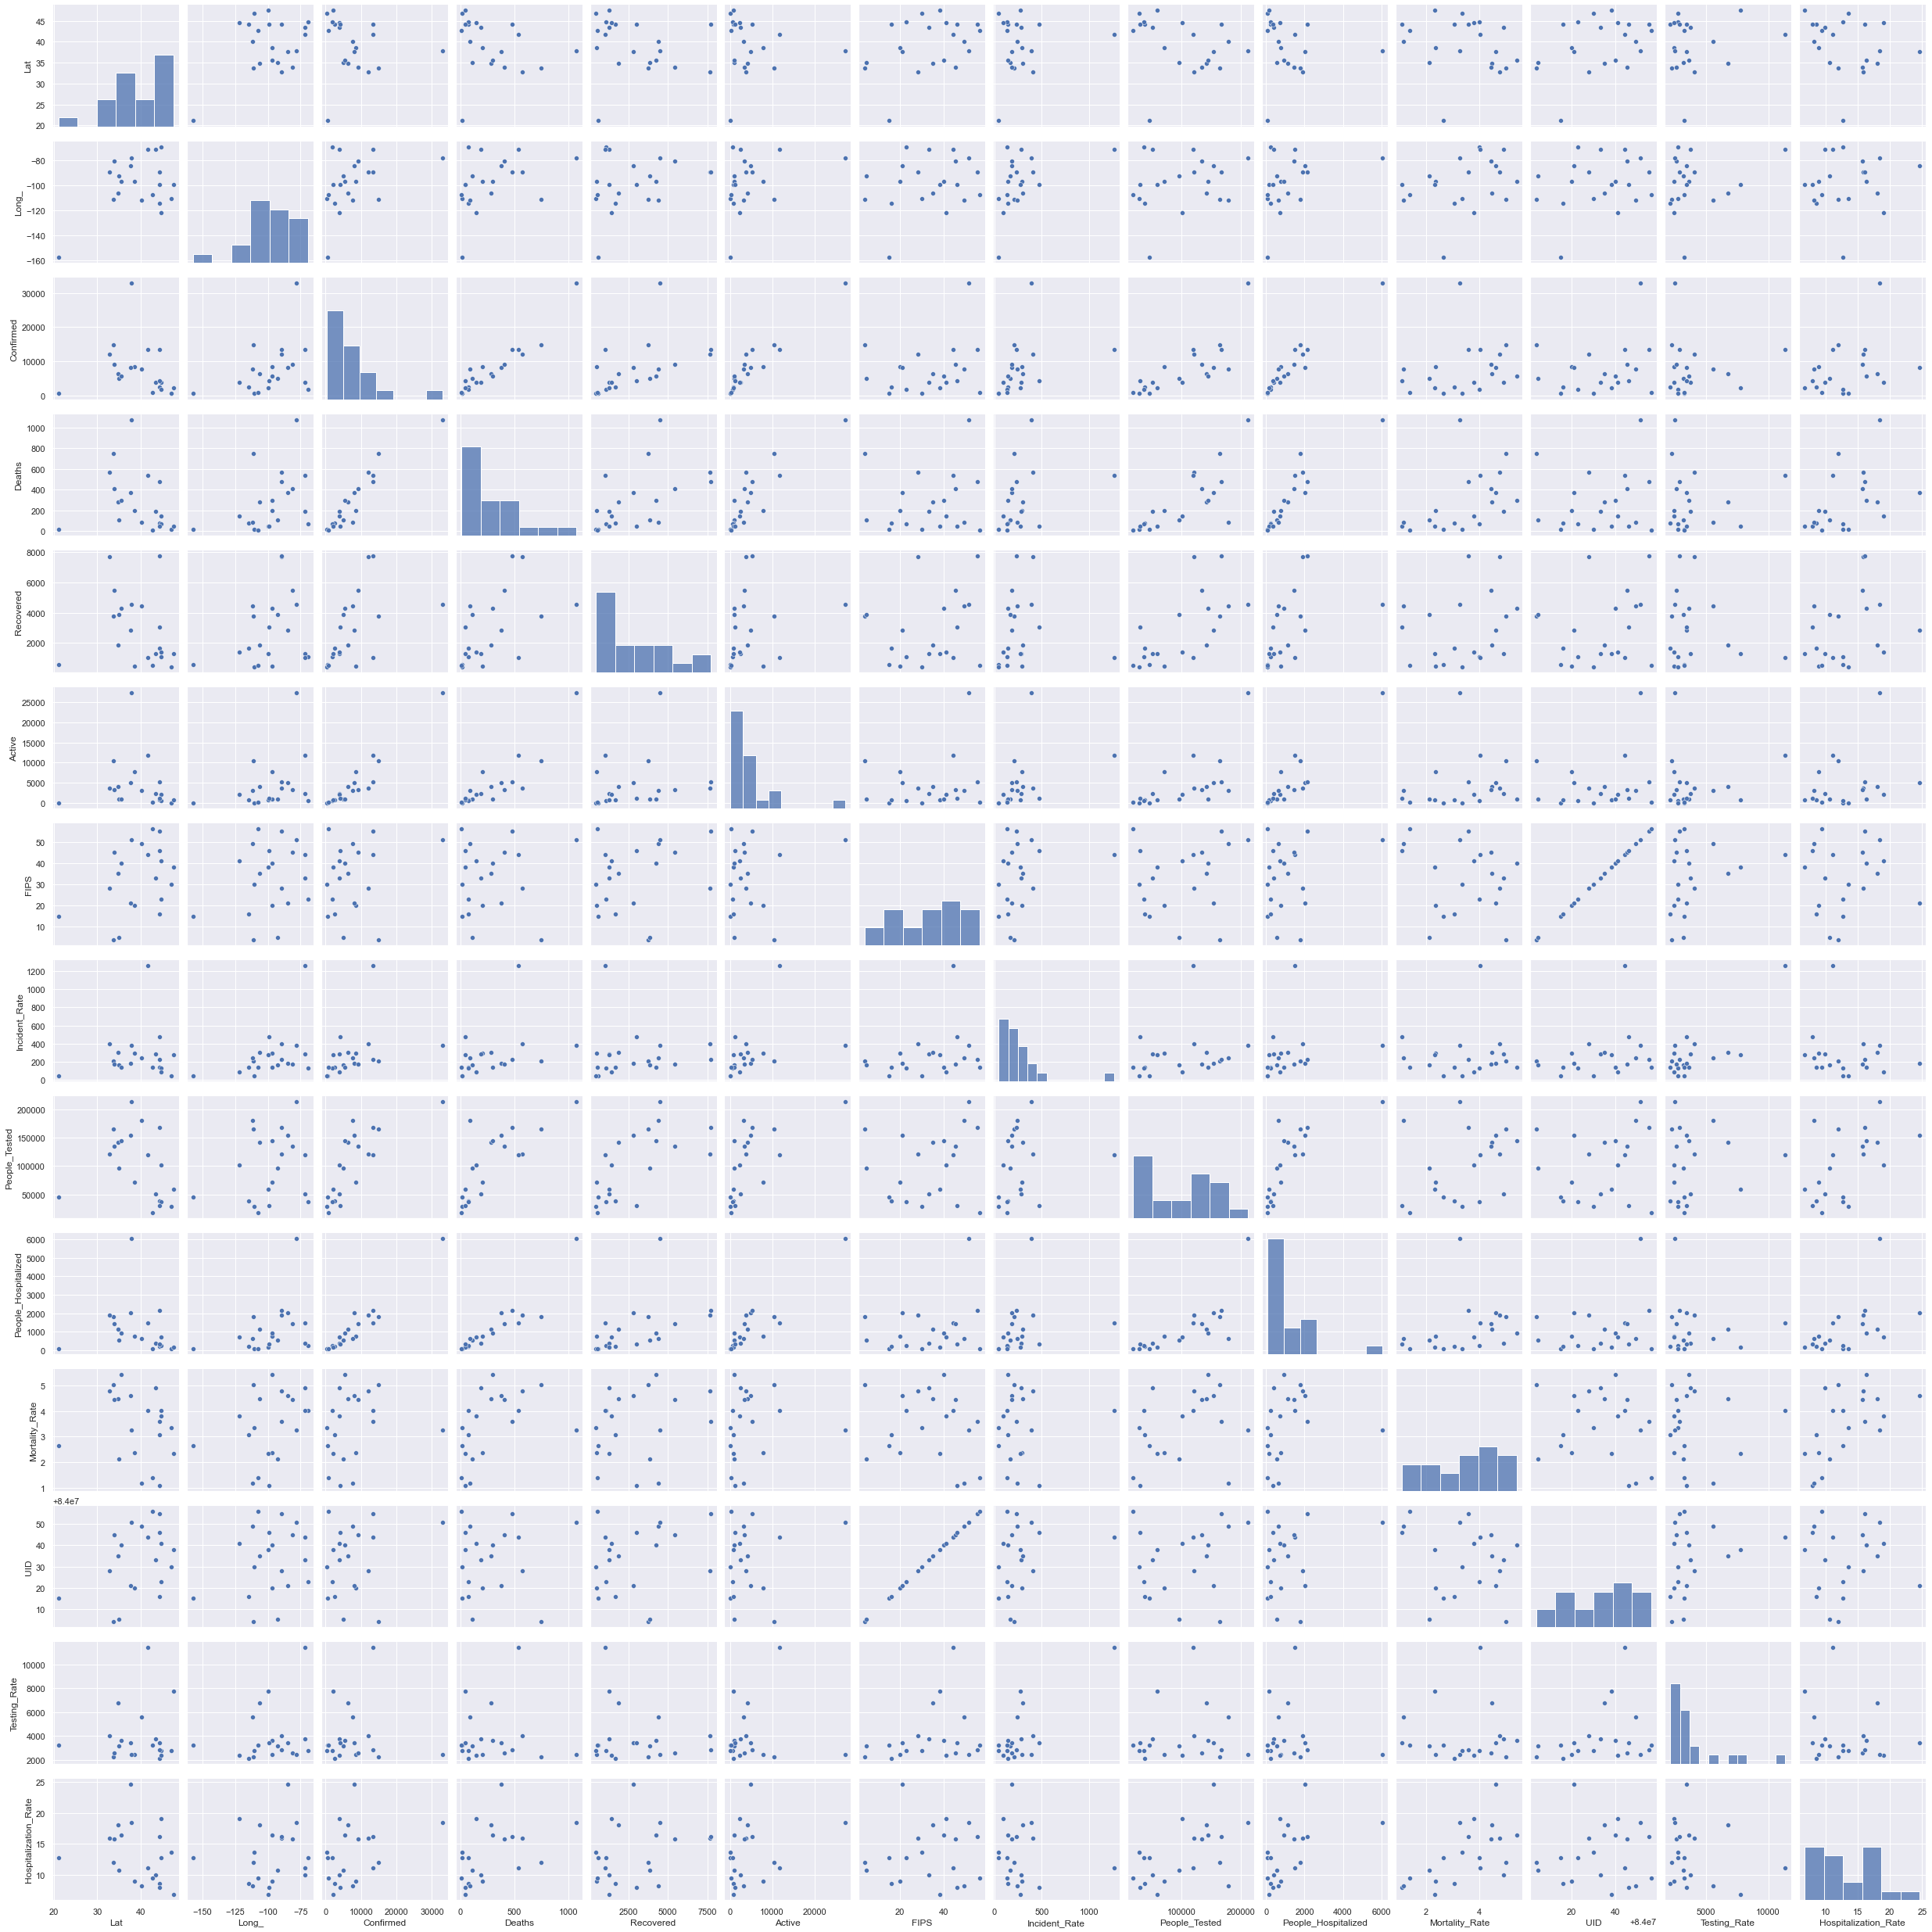

In [49]:
sns.pairplot(data_clean)

In [50]:
data_clean_us = data_clean[data_clean["Country_Region"] == "US"].reset_index(drop=True)
data_clean_us.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
1,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
2,Hawaii,US,2020-05-21 02:32:54,21.0943,-157.4983,643,17,578.0,48.0,15,45.413710,46304.0,82.0,2.643857,84000015,USA,3270.352122,12.752722
3,Idaho,US,2020-05-21 02:32:54,44.2405,-114.4788,2506,77,1668.0,761.0,16,140.229930,38567.0,215.0,3.072626,84000016,USA,2158.119598,8.579409
4,Kansas,US,2020-05-21 02:32:54,38.5266,-96.7265,8507,202,473.0,7832.0,20,292.004226,71203.0,760.0,2.374515,84000020,USA,2444.055121,8.933819


In [51]:
data_clean_us.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000
mean,39.301286,-98.196962,7482.619048,276.095238,2820.380952,4386.142857,33.095238,267.011156,101100.238095,1098.619048,3.422673,8.400003e+07,3924.873332,13.181610
std,6.267666,20.411919,7318.370765,280.061048,2244.192337,6203.673487,15.578526,254.145947,58526.426361,1332.074941,1.306544,1.557853e+01,2248.308903,4.570918
min,21.094300,-157.498300,478.000000,11.000000,440.000000,22.000000,4.000000,44.723974,18840.000000,65.000000,1.101269,8.400000e+07,2158.119598,6.778043
25%,34.969700,-110.454400,2506.000000,73.000000,1100.000000,761.000000,21.000000,139.803906,46304.000000,231.000000,2.374515,8.400002e+07,2623.237570,9.402795
50%,40.150000,-96.928900,5532.000000,190.000000,1882.000000,2403.000000,35.000000,204.788838,102149.000000,723.000000,3.586073,8.400004e+07,3255.240955,12.699285
75%,44.268500,-84.670100,9175.000000,407.000000,4266.000000,4965.000000,45.000000,292.004226,144371.000000,1486.000000,4.479975,8.400004e+07,3742.560000,16.111235
max,47.528900,-69.381900,32908.000000,1075.000000,7728.000000,27310.000000,56.000000,1260.760024,212626.000000,6059.000000,5.404917,8.400006e+07,11377.424693,24.611240
